In [77]:
% matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

# Superposition de deux OPPH de pulsations voisines.

On considère la superposition de 2 OPPHs de pulsations voisines $\omega_{1}$ et $\omega_{2}$ et de même amplitude $u_{0}$ donnée par:
$$u(x,t)=u_{0}\left[\cos(k_{1}x-\omega_{1}t)+\cos(k_{2}x-\omega_{2}t)\right] $$
où $k_{1}$ et $k_{2}$ sont respectivement reliés à $\omega_{1}$
et $\omega_{2}$ par la relation de dispersion du milieu.
1. Établir $u(x,t)$ sous la forme d'un produit d'OPPHs. Commenter.
2. Établir les vitesses de phase de ces deux OPPHs.




Dans le cadre ci-dessous, on définit une fonction `def OPPH(x,t,w,k)` qui renvoie la valeur de l'onde $\cos(kx-\omega t)$ ainsi que la fonction `def k(w)` qui est la relation de dispersion du milieu considéré.

In [78]:
def OPPH(x,t,w,k):
    return np.cos(k*x-w*t)
def k(w):
    return w/3

Dans le cadre ci-dessous, tracer la fonction u(x,t) de deux manières:
1. En écrivant $u(x,t)$ sous forme de somme comme indiqué ci-dessus
2. En utilisant la forme de produit trouvée précédemment. Vérifier votre résultat.


On représentera $u(x,t)$ sur l'intervalle 
$x\in\left[-4;4\right]$ à l'instant $t=0$ en choisissant $u_0=2$, $\omega_1=80$ et $\omega_2=84$.

1. Commenter l'allure du signal obtenu.
2. Sur l'écriture de $u(x,t)$ trouvée précédemment, identifier un terme d'enveloppe et un terme de pulsation moyenne.

3. On note $\Delta T$ la taille du motif, c'est-à-dire la demi-période de l'enveloppe.  Que vaut le produit $\Delta T\times \left(\omega_2-\omega_1\right)$?

La période de l'enveloppe est $T_e=\frac{2\pi}{\omega_e}=\frac{4\pi}{\omega_2-\omega_1}$
On obtient alors:
$$
\Delta T\times \left(\omega_2-\omega_1\right)=2\pi
$$

# Superpostion d'un grand nombres de pulsations
Les programmes suivants permettent de tracer les spectres et les signaux temporels associés à une superposition de plusieurs OPPHs de pulsations proches et en nombre de plus en plus important.

Vous pouvez tracer une somme d'OPPH de même amplitude, d'amplitude qui varie de façon triangulaire ou normale.
Observer comment varie l'étalement temporel des signaux et celui des spectres.

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import time

x = np.linspace(-400,400,5e3)
y=np.zeros(len(x))


def f(x,a,b,c):
    return a*np.cos(b*x+c)

def spectr_carree(ax,wmin,wmax,Ntot,N):
    """ trace le spectre carree compris entre wmin,wmax et renvoie
    le nbre N de raies sur un découpage total de Ntot"""
    x=np.array([wmin-(wmax-wmin)/4,wmin,wmin,wmax,wmax,wmax+(wmax-wmin)/4])
    y=np.array([0,0,1,1,0,0])
    ax.plot(x,y,'g--')
    ax.set_ylim(-0.1,1.2)

    
    Tw=np.linspace(wmin,wmax,Ntot)
    Tw=np.add(Tw,+(wmax-wmin)/10/Ntot) # décalage pour plot de l'histogramme
    n,bins,patches=ax.hist(Tw[(Ntot-N)//2:(Ntot-N)//2+N],bins=Ntot,range=[wmin,wmax+(wmax-wmin)/(Ntot-1)],rwidth=0.5,align='left')
    #ax.show()
    #print('bins',bins)
    #print('Tw',Tw)
    return n,bins,x,y


def spectr_tri(ax,wmin,wmax,Ntot,N):
    """ trace le spectre triangulaire compris entre wmin,wmax et renvoie
    le nbre N de raies sur un découpage total de Ntot"""
    x=np.array([wmin-(wmax-wmin)/4,wmin,(wmin+wmax)/2,wmax,wmax+(wmax-wmin)/4])
    y=np.array([0,0,1,0,0])
    ax.plot(x,y,'g--')
    ax.set_ylim(-0.1,1.2)

    
    Tw=np.linspace(wmin,wmax,Ntot)
    Ta=np.zeros(len(Tw))
    
    for i in range(len(Tw)):
        if Tw[i]<=(wmin+wmax)/2 and i>=(Ntot-N)//2:
            Ta[i]=2/(wmax-wmin)*(Tw[i]-wmin)
        elif Tw[i]>(wmin+wmax)/2 and i<(Ntot-N)//2+N:
            Ta[i]=2/(wmax-wmin)*(wmax-Tw[i])
    
    Tw=np.add(Tw,+(wmax-wmin)/10/Ntot)# décalage pour plot de l'histogramme
    n,bins,patches=ax.hist(Tw,bins=Ntot,range=[wmin,wmax+(wmax-wmin)/(Ntot-1)],weights=Ta,rwidth=0.5,align='left')
    #ax.show()
    #print('bins',bins)
    #print('Tw',Tw)
    return n,bins,x,y

def normal(w,w0,dw):
    return np.exp(-((w-w0)/dw)**2/2)
def spectr_gauss(ax,wmin,wmax,Ntot,N):
    x=np.linspace(wmin-(wmax-wmin)/4,wmax+(wmax-wmin)/4,500)
    y=normal(x,(wmin+wmax)/2,(wmax-wmin)/5)
    ax.plot(x,y,'g--')
    ax.set_ylim(-0.1,1.2)

    Tw=np.linspace(wmin,wmax,Ntot)
    Ta=np.zeros(len(Tw))
    
    for i in range(len(Tw)):
        if i>=(Ntot-N)//2 and i<(Ntot-N)//2+N:
            Ta[i]=normal(Tw[i],(wmin+wmax)/2,(wmax-wmin)/5)
            
    Tw=np.add(Tw,+(wmax-wmin)/10/Ntot)# décalage pour plot de l'histogramme
    n,bins,patches=ax.hist(Tw,bins=Ntot,range=[wmin,wmax+(wmax-wmin)/(Ntot-1)],weights=Ta,rwidth=0.5,align='left')
    #ax.show()
    #print('bins',bins)
    #print('Tw',Tw)
    return n,bins,x,y


def plot_temps(ax,tmax,TT):
    #plt.clf()
    t=np.linspace(-tmax,tmax,5000)
    y=np.array([0]*len(t))
    for i in range(len(TT[0])):
        y=np.add(y,f(t,TT[0][i],TT[1][i],0))
    ax.plot(t,y)
    #plt.show()
    return t,y

#phase=[random() for i in range(-10,10)]
#for i in range(-10,10):
#    plt.clf()
#    y=np.add(y,f(x,1,(50+i)/50,phase[i]))
#    plt.plot(x,y)
#    plt.show()
#spectr_carree(8,12,25,5)




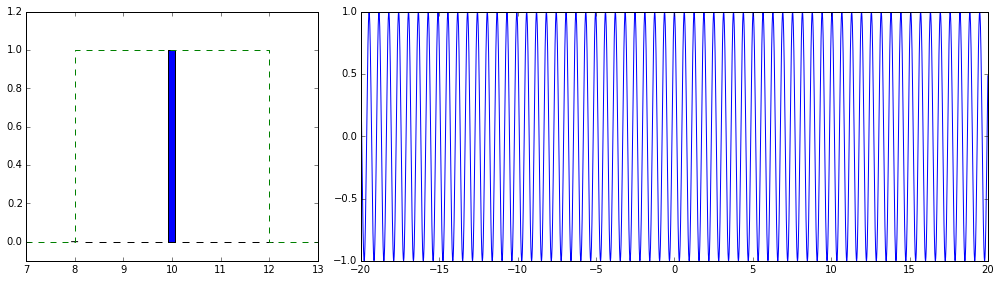

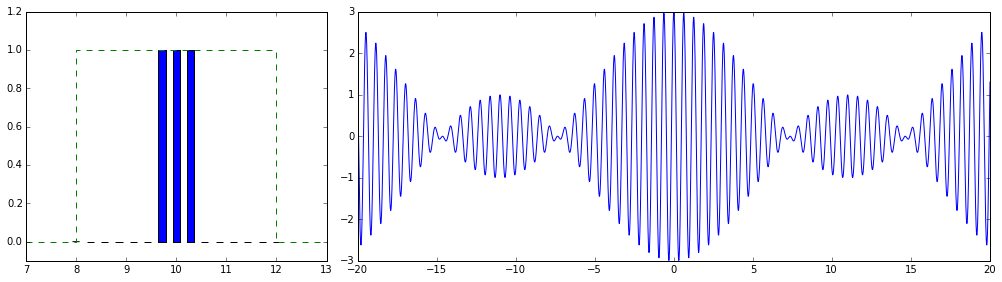

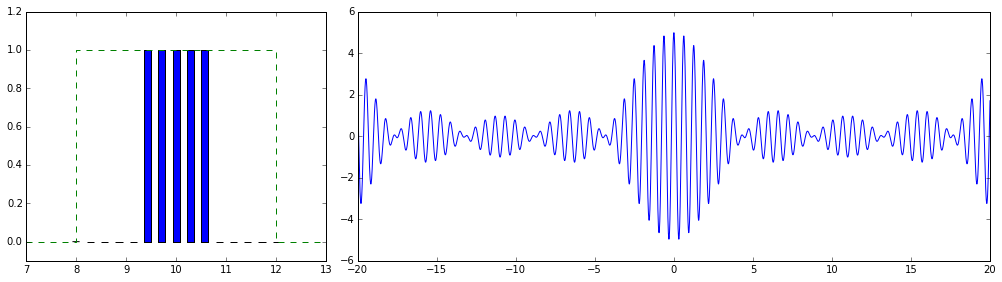

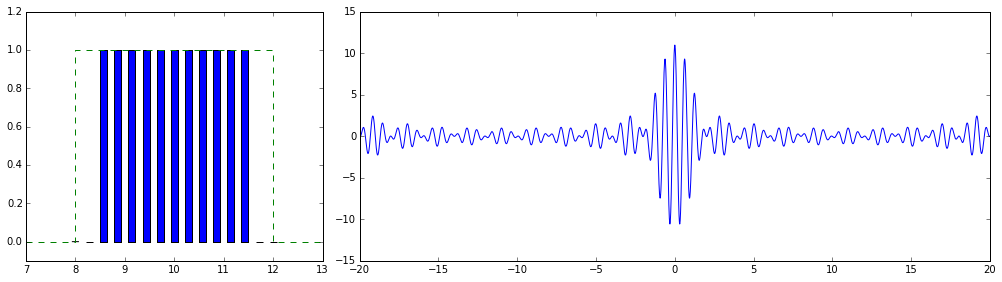

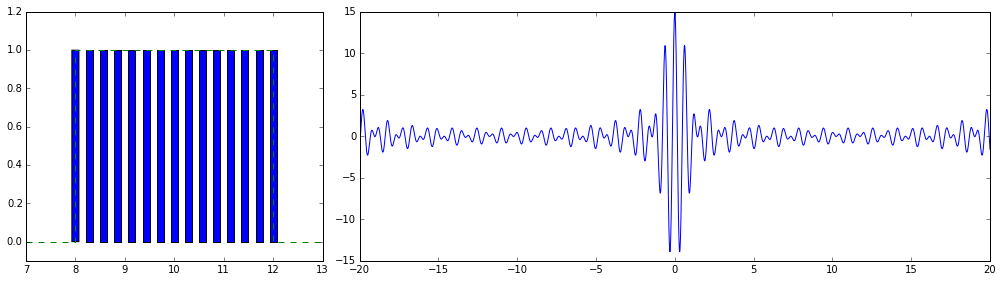

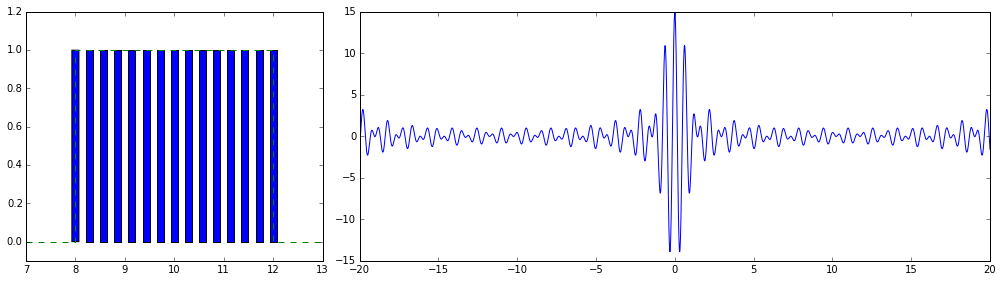

In [83]:
#set figure
fig=plt.figure(num=0,figsize=(14,4))
ax1=plt.subplot2grid((1,3), (0,0))
ax2=plt.subplot2grid((1,3), (0,1), colspan=2)
ax1.set_ylim(-0.1,1.2)

for i in [1,3,5,11,15]:
    
    fig.get_axes()[0].cla()
    fig.get_axes()[1].cla()
    
    TT= spectr_carree(ax1,8,12,15,i)
    plot_temps(ax2,20,TT)
    plt.tight_layout()
    display(fig)
    #plt.waitforbuttonpress(timeout=1)

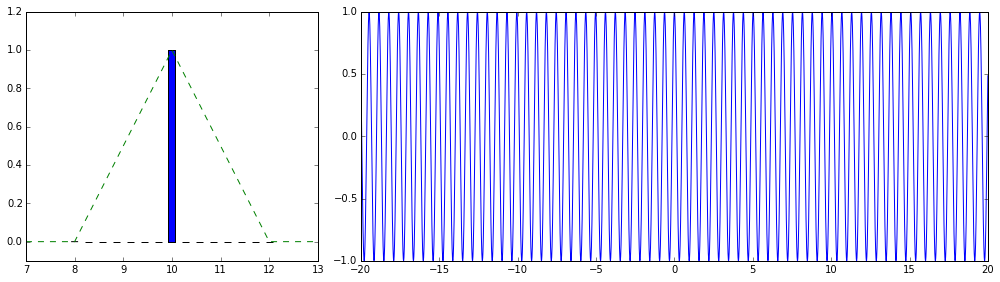

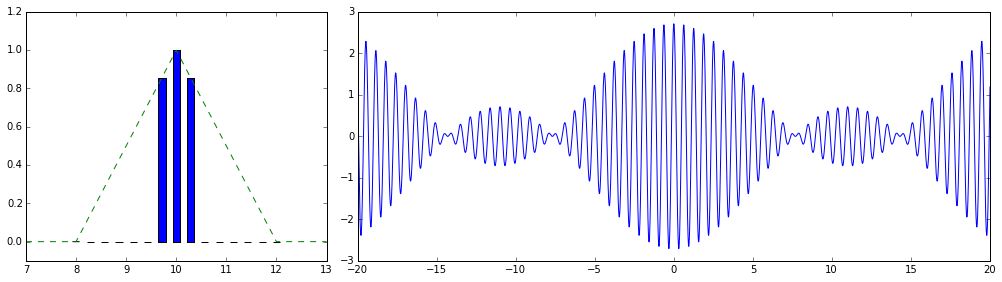

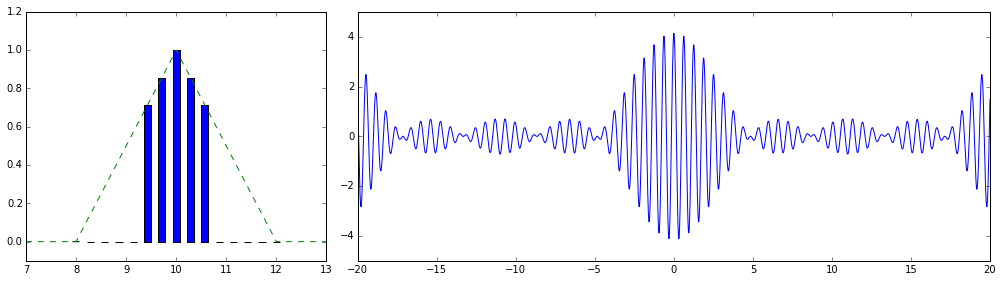

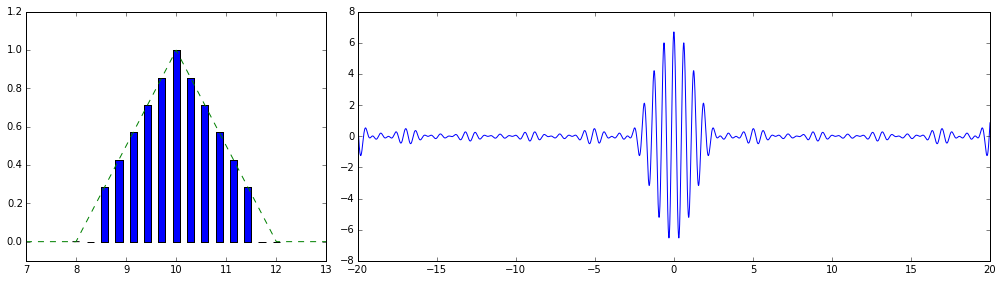

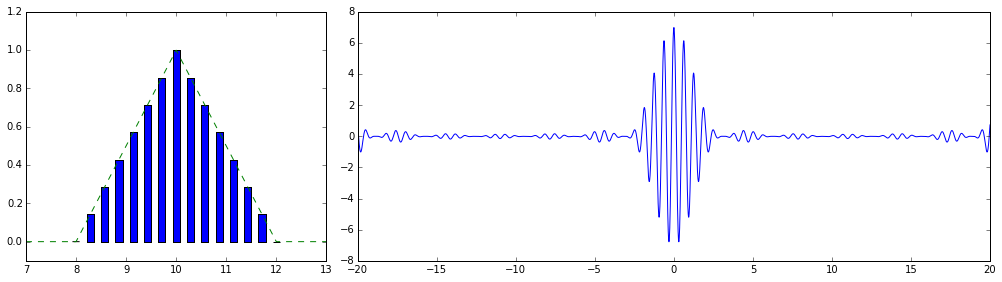

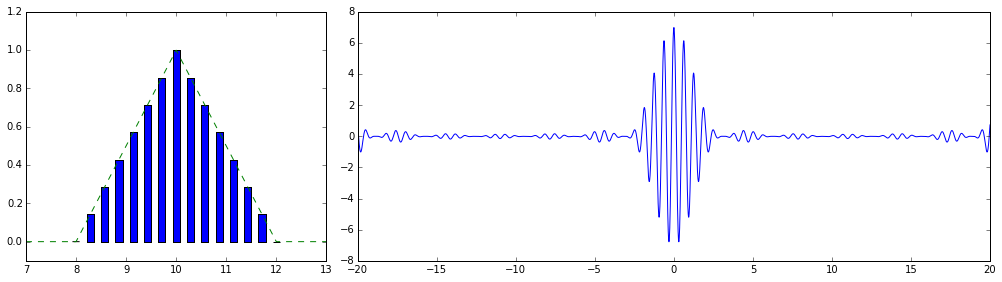

In [84]:
#set figure
fig=plt.figure(num=0,figsize=(14,4))
ax1=plt.subplot2grid((1,3), (0,0))
ax2=plt.subplot2grid((1,3), (0,1), colspan=2)
ax1.set_ylim(-0.1,1.2)

for i in [1,3,5,11,15]:
    
    fig.get_axes()[0].cla()
    fig.get_axes()[1].cla()
    
    TT= spectr_tri(ax1,8,12,15,i)
    plot_temps(ax2,20,TT)
    plt.tight_layout()
    display(fig)
    #plt.waitforbuttonpress(timeout=1)

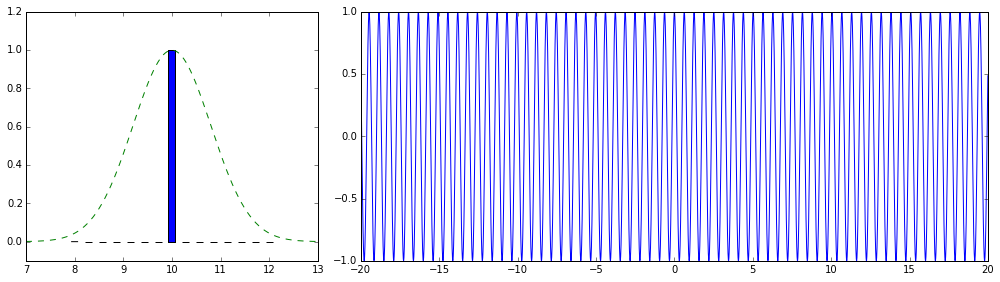

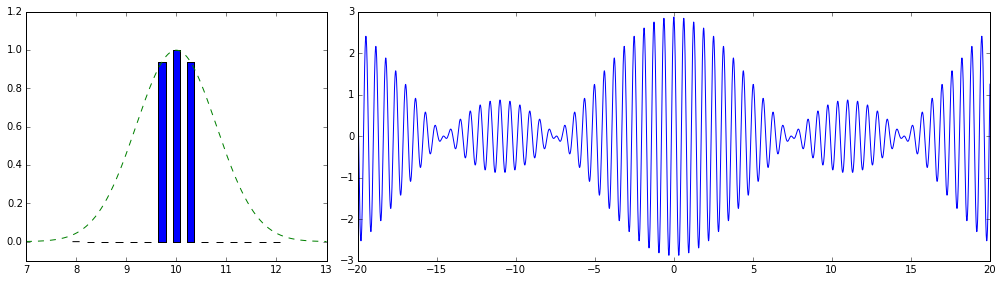

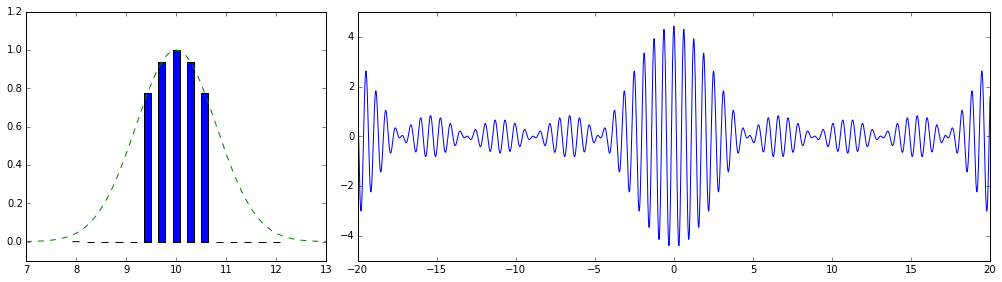

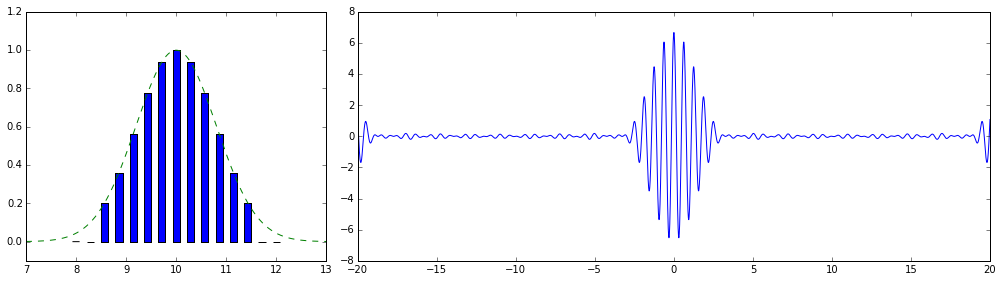

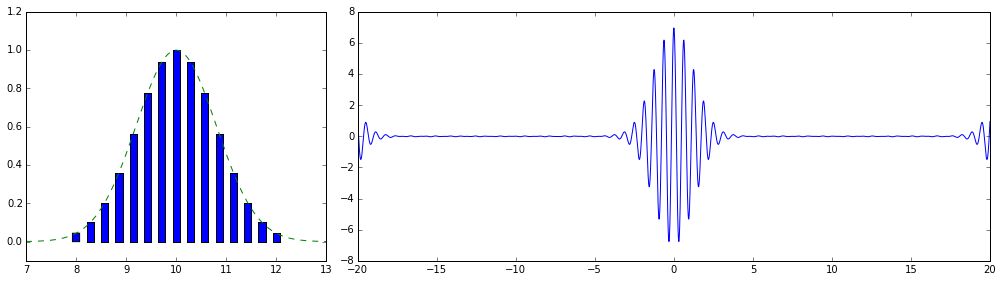

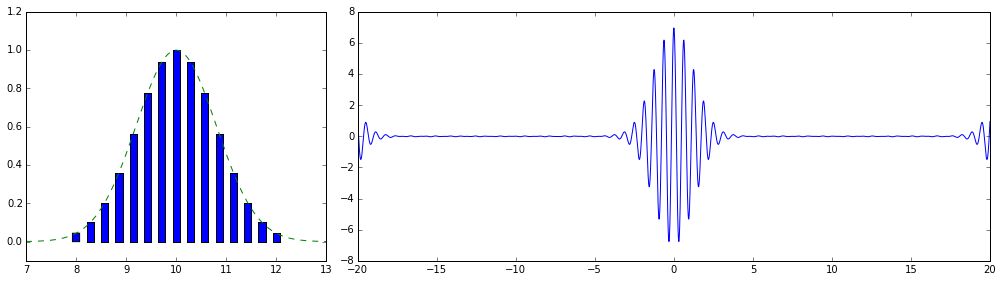

In [85]:
#set figure
fig=plt.figure(num=0,figsize=(14,4))
ax1=plt.subplot2grid((1,3), (0,0))
ax2=plt.subplot2grid((1,3), (0,1), colspan=2)
ax1.set_ylim(-0.1,1.2)

for i in [1,3,5,11,15]:
    
    fig.get_axes()[0].cla()
    fig.get_axes()[1].cla()
    
    TT= spectr_gauss(ax1,8,12,15,i)
    plot_temps(ax2,20,TT)
    plt.tight_layout()
    display(fig)
    #plt.waitforbuttonpress(timeout=1)

On voit que plus le nombre d'OPPHs est important, plus l'onde devient localisée et ressemble à un "paquet d'onde".

On peut également remarquer que plus l'écart $\Delta\omega$   entre les pulsations extrêmes du signal est important, plus l'extension temporelle $\Delta t$ du signal est faible.

In [86]:
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

In [87]:
PDF('5_Paquet_ondes.pdf',size=(1024,500))